In [1]:
import os
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cupy as cp

In [2]:
# Change the working directory to the parent directory to allow importing the segadb package.
notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..', '..'))
sys.path.append(parent_dir)

# from sega_learn.neural_networks import *

# print(f"Working directory: {notebook_dir}")
# print(f"Parent directory: {parent_dir}")

In [3]:
def time_function(func, num_repeats, *args, **kwargs):
    times = []
    for _ in range(num_repeats):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        times.append(end_time - start_time)
    avg_time = np.mean(times)
    stddev_time = np.std(times)
    return avg_time, stddev_time, result

In [4]:
from test_nn import *
from test_nn_cupy import *
from test_nn_numba import *

## Run Time Comparison of Neural Network Implementations
### Comparison of CPU (numpy) and CPU (cupy) implementations

In [12]:
# Constants for testing
num_repeats = 10

# Neural Network Timing
nnt_layer_sizes_multiplier = 5
nnt_dataset_size = 100_000

# Optimizer Timing
optt_layer_sizes_multiplier = 25

# Loss Function Timing
losst_layer_sizes_multiplier = 10
losst_dataset_size = 1_000_000

# Train Epoch Timing
epocht_layer_sizes_multiplier = 2
epocht_dataset_sizes = [1_000, 5_000, 10_000, 50_000, 100_000, 250_000, 500_000]

In [7]:
# Compile Numba functions
init_compile()

Compiling Numba JIT code...
   ...Compiling small neural network: Time: 2.72 seconds
   ...Compiling optimizers: Time: 10.64 seconds
   ...Compiling loss functions: Time: 11.59 seconds
   ...Compiling training step: Time: 31.65 seconds

Numba JIT code compilation completed in 31.65 seconds.


#### Neural Network Timing

In [8]:
print("Base NN Timing Implementation:")
nn_base = time_nn_base(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

print("\n\nCuPy NN Timing Implementation:")
nn_cupy = time_nn_cupy(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

print("\n\nNumba NN Timing Implementation:")
nn_numba = time_nn_numba(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

Base NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 10 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 100,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std Dev (s)
forward             : 0.830181 seconds ± 0.015910 seconds
apply_dropout       : 0.675272 seconds ± 0.015349 seconds
backward            : 0.523539 seconds ± 0.024949 seconds
calculate_loss      : 0.620828 seconds ± 0.034013 seconds
evaluate            : 0.478243 seconds ± 0.026398 seconds
train (X,y Reduced) : 0.974309 seconds ± 0.021711 seconds


CuPy NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 10 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 100,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std De

#### Optimizer Timing

In [9]:
print("Base NN Optimizer Implementation:")
nn_optimizer_times = time_nn_optimizer(num_repeats, optt_layer_sizes_multiplier)

print("\n\nCuPy NN Optimizer Implementation:")
nn_optimizer_times_cupy = time_nn_optimizer_cupy(num_repeats, optt_layer_sizes_multiplier)

print("\n\nNumba NN Optimizer Implementation:")
nn_optimizer_times_numba = time_nn_optimizer_numba(num_repeats, optt_layer_sizes_multiplier)

Base NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
----------------------------------------------------------------------------------------------------
Optimizer Function       : Average Time (s) ±  Std Dev (s)
Adam_initialize          : 0.023116 seconds ± 0.004371 seconds
SGD_initialize           : 0.014394 seconds ± 0.002707 seconds
Adadelta_initialize      : 0.025659 seconds ± 0.001870 seconds
----------------------------------------------------------------------
Adam_update              : 0.313632 seconds ± 0.010873 seconds
SGD_update               : 0.112836 seconds ± 0.002925 seconds
Adadelta_update          : 0.382922 seconds ± 0.029993 seconds


CuPy NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
-----------------------------------------------------------------------------------------

#### Loss Function Timing

In [10]:
print("Base NN Loss Implementation:")
nn_loss_base = time_nn_loss(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

print("\n\nCuPy NN Loss Implementation:")
nn_loss_cupy = time_nn_loss_cupy(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

print("\n\nNumba NN Loss Implementation:")
nn_loss_numba = time_nn_loss_numba(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

Base NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 2.716925 seconds ± 0.860449 seconds
BCEWithLogitsLoss        : 0.044601 seconds ± 0.004122 seconds


CuPy NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 0.248862 seconds ± 0.028922 seconds
BCEWithLogitsLoss        : 0.005999 seconds ± 0.014001 seconds


Numba NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs)

#### Epoch Timings

In [13]:
print("Base NN Single Epoch Implementation:")
nn_epoch_base = time_nn_epoch(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

print("\n\nCuPy NN Single Epoch Implementation:")
nn_epoch_cupy = time_nn_epoch_cupy(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

print("\n\nNumba NN Single Epoch Implementation:")
nn_epoch_numba = time_nn_epoch_numba(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

Base NN Single Epoch Implementation:

Timing results for NeuralNetwork train method (averaged over 10 runs):
Performance for Layer sizes: [200, 100, 20]
----------------------------------------------------------------------------------------------------
Dataset Size        : Average Time (s) ±  Std Dev (s)
1,000               : 0.010620 seconds ± 0.001702 seconds
5,000               : 0.045523 seconds ± 0.004394 seconds
10,000              : 0.101282 seconds ± 0.007873 seconds
50,000              : 0.472289 seconds ± 0.014628 seconds
100,000             : 1.043464 seconds ± 0.080207 seconds
250,000             : 2.528951 seconds ± 0.229806 seconds
500,000             : 4.697563 seconds ± 0.135986 seconds


CuPy NN Single Epoch Implementation:

Timing results for NeuralNetwork train method (averaged over 10 runs):
Performance for Layer sizes: [200, 100, 20]
----------------------------------------------------------------------------------------------------
Dataset Size        : Average 

## Visualization of Neural Network Timing Results

### Setup

In [14]:
# Combine results from CPU, CuPy, and Numba
def combine_results(*results_dicts):
    combined_results = []
    for results_dict in results_dicts:
        for func_name, (avg_time, stddev_time) in results_dict.items():
            combined_results.append([func_name, avg_time, stddev_time])
    
    # Create DataFrame from collected results
    results = pd.DataFrame(combined_results, columns=["Function", "Average Time (s)", "Std Dev (s)"])
    
    return results

In [15]:
cpu_results = combine_results(nn_base, nn_optimizer_times, nn_loss_base)
cupy_results = combine_results(nn_cupy, nn_optimizer_times_cupy, nn_loss_cupy)
numba_results = combine_results(nn_numba, nn_optimizer_times_numba, nn_loss_numba)

In [16]:
# Add a column to distinguish CPU and CuPy results
cpu_results["Implementation"] = "CPU"
cupy_results["Implementation"] = "CuPy"
numba_results["Implementation"] = "Numba"

# Combine the datasets
results = pd.concat([cpu_results, cupy_results, numba_results])
results

,Function,Average Time (s),Std Dev (s),Implementation
0,forward,0.830181,0.015910,CPU
1,apply_dropout,0.675272,0.015349,CPU
2,backward,0.523539,0.024949,CPU
3,calculate_loss,0.620828,0.034013,CPU
4,evaluate,0.478243,0.026398,CPU
5,train,0.974309,0.021711,CPU
6,Adam_initialize,0.023116,0.004371,CPU
7,Adam_update,0.313632,0.010873,CPU
8,SGD_initialize,0.014394,0.002707,CPU
9,SGD_update,0.112836,0.002925,CPU


In [17]:
# Create a pivot table for easier comparison
pivot_results = results.pivot(index='Function', columns='Implementation', values='Average Time (s)').reset_index()
pivot_results['Speedup (%) CuPy'] = ((pivot_results['CPU'] - pivot_results['CuPy']) / pivot_results['CPU'] * 100)
pivot_results['Speedup (%) Numba'] = ((pivot_results['CPU'] - pivot_results['Numba']) / pivot_results['CPU'] * 100)

# Sort functions by CPU execution time for better readability
pivot_results = pivot_results.sort_values('CPU', ascending=False)
pivot_results

Implementation,Function,CPU,CuPy,Numba,Speedup (%) CuPy,Speedup (%) Numba
5,CrossEntropyLoss,2.716925,0.248862,0.536953,90.840292,80.236730
13,train,0.974309,0.983028,0.370258,-0.894875,61.997939
12,forward,0.830181,0.039000,0.683900,95.302257,17.620315
8,apply_dropout,0.675272,0.000697,0.477325,99.896709,29.313706
10,calculate_loss,0.620828,0.325846,0.507791,47.514305,18.207438
9,backward,0.523539,0.175140,0.538986,66.546999,-2.950390
11,evaluate,0.478243,0.168279,0.478299,64.813084,-0.011616
1,Adadelta_update,0.382922,0.065100,0.185859,82.999189,51.463031
3,Adam_update,0.313632,0.001602,0.168598,99.489307,46.243435
7,SGD_update,0.112836,0.000701,0.098370,99.379170,12.820177


In [18]:
_nn_epoch_base = pd.DataFrame(nn_epoch_base, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_base["Implementation"] = "CPU"

_nn_epoch_cupy = pd.DataFrame(nn_epoch_cupy, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_cupy["Implementation"] = "CuPy"

_nn_epoch_numba = pd.DataFrame(nn_epoch_numba, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_numba["Implementation"] = "Numba"

# Combine the datasets
epoch_results = pd.concat([_nn_epoch_base, _nn_epoch_cupy, _nn_epoch_numba])
epoch_results

,Dataset Size,Average Time (s),Std Dev (s),Implementation
0,1000,0.010620,0.001702,CPU
1,5000,0.045523,0.004394,CPU
2,10000,0.101282,0.007873,CPU
3,50000,0.472289,0.014628,CPU
4,100000,1.043464,0.080207,CPU
5,250000,2.528951,0.229806,CPU
6,500000,4.697563,0.135986,CPU
0,1000,0.041296,0.043937,CuPy
1,5000,0.071900,0.007780,CuPy
2,10000,0.128500,0.002013,CuPy


In [19]:
# Set Seaborn style with improved readability
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['font.family'] = 'sans-serif'

### Visualizations

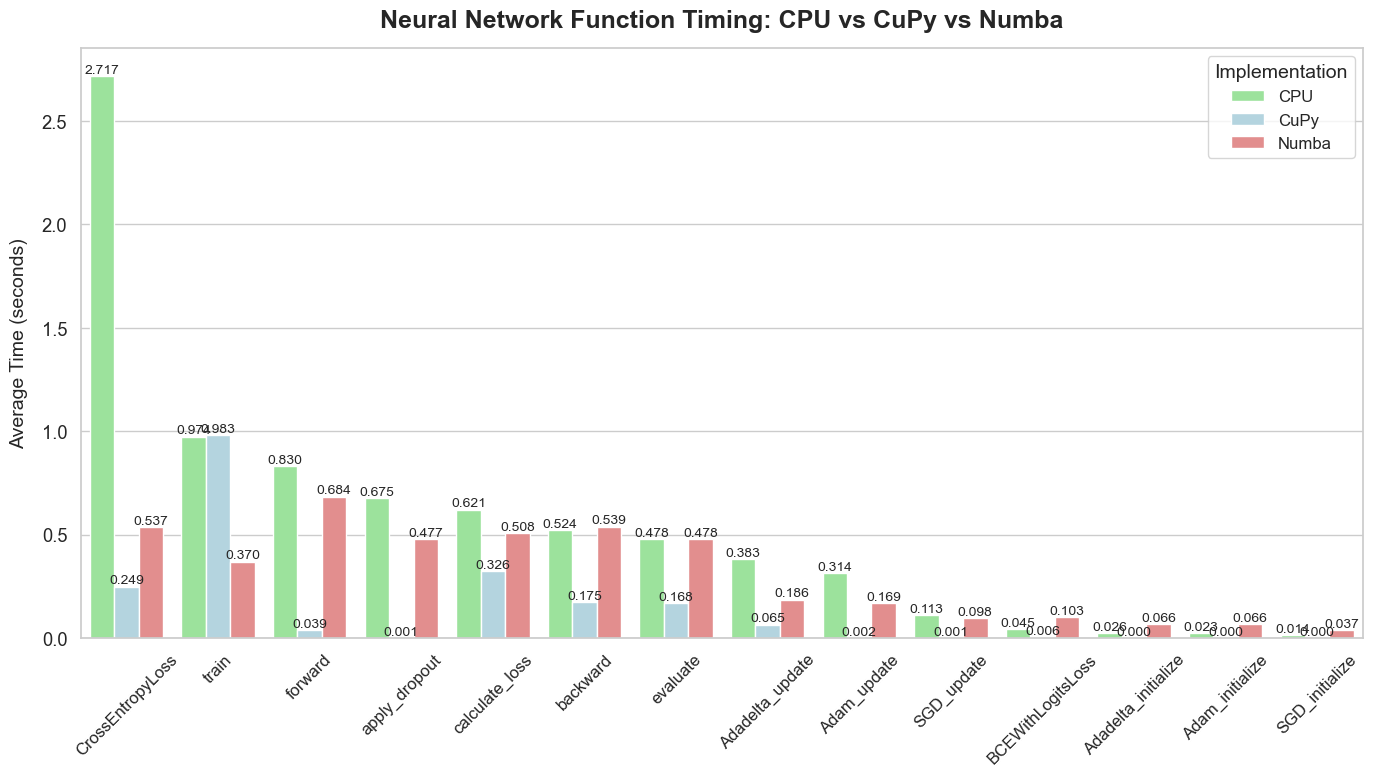

In [20]:
# First plot: Timing comparison
plt.figure(figsize=(14, 8))
melted_data = pd.melt(pivot_results, id_vars=['Function'], value_vars=['CPU', 'CuPy', 'Numba'])
melted_data.rename(columns={'variable': 'Implementation'}, inplace=True)

sns.barplot(x='Function', y='value', hue='Implementation', 
            data=melted_data,
            palette=['lightgreen', 'lightblue', 'lightcoral'])

plt.title('Neural Network Function Timing: CPU vs CuPy vs Numba', fontsize=18, fontweight='bold')
plt.ylabel('Average Time (seconds)', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Implementation', fontsize=12, title_fontsize=14)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f', fontsize=10)

plt.tight_layout()
plt.show()

In [21]:
# # Second plot: Speedup percentage
# pivot_results.sort_values('Speedup (%)', ascending=False)

# plt.figure(figsize=(14, 8))
# speedup_bars = sns.barplot(x='Function', y='Speedup (%)', data=pivot_results, hue='Function')
# plt.title('CuPy Speedup Percentage Compared to CPU', fontsize=18, fontweight='bold')
# plt.ylabel('Speedup (%)', fontsize=14)
# plt.xlabel('Function', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)

# # Add value labels on speedup bars
# for i, v in enumerate(pivot_results['Speedup (%)']):
#     plt.text(i, max(v + 5, 5) if v > 0 else v - 15, 
#              f"{v:.1f}%", ha='center', fontsize=10, 
#              fontweight='bold', color='black')

# # Highlight negative speedups (where CPU is faster)
# for i, v in enumerate(pivot_results['Speedup (%)']):
#     if v < 0:
#         speedup_bars.patches[i].set_facecolor('#FF7F7F')  # Light red for negative speedup

# plt.tight_layout()
# plt.show()

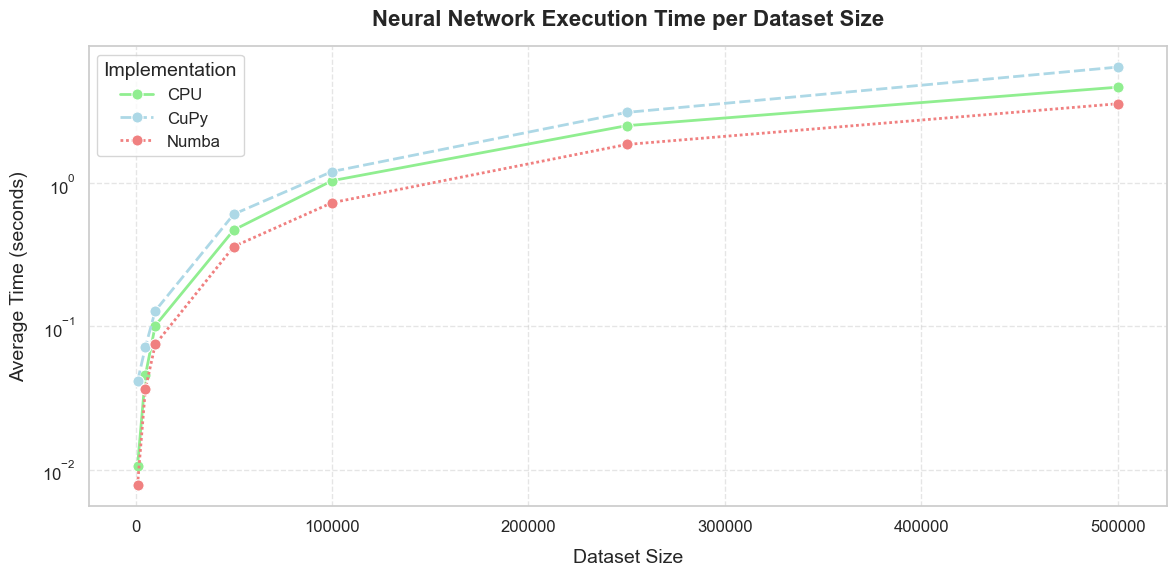

In [22]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=epoch_results, x="Dataset Size", y="Average Time (s)", 
             hue="Implementation", marker="o", 
             palette=["lightgreen", "lightblue", "lightcoral"],
             linewidth=2, markersize=8, 
             err_style="bars", err_kws={'capsize': 4}, 
             style="Implementation")

# Add title and labels
plt.title("Neural Network Execution Time per Dataset Size", fontsize=16, fontweight="bold")
plt.xlabel("Dataset Size", fontsize=14)
plt.ylabel("Average Time (seconds)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Implementation", fontsize=12, title_fontsize=14)

# log scale
plt.yscale("log")

# Show the plot
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
